# DATA ENGINERING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/umay/Desktop/pj3data/train.csv')
asset = pd.read_csv('/Users/umay/Desktop/pj3data/asset_details.csv')

In [3]:
asset

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [4]:
bnb = df[df['Asset_ID'] == 0]
btc = df[df['Asset_ID'] == 1]
bch = df[df['Asset_ID'] == 2]
ada = df[df['Asset_ID'] == 3]
doge = df[df['Asset_ID'] == 4]
eos = df[df['Asset_ID'] == 5]
eth = df[df['Asset_ID'] == 6]
etc = df[df['Asset_ID'] == 7]
iota = df[df['Asset_ID'] == 8]
ltc = df[df['Asset_ID'] == 9]
mkr = df[df['Asset_ID'] == 10]
xmr = df[df['Asset_ID'] == 11]
xlm = df[df['Asset_ID'] == 12]
trx = df[df['Asset_ID'] == 13]

In [5]:
# select those start at 2018-01-01 and end at 2021-09-21
# manipulate bnb, btc, bch, eos, eth, etc, ltc, xmr

fill_method = 'nearest'

# function that sets timestamp as index and fills na with forward fill
def fill_missing_value(data, fill_method):
    data.set_index('timestamp', inplace=True)
    timeframe = range(data.index[0], data.index[-1]+60, 60)
    data = data.reindex(timeframe, method=fill_method)
    # check NAs after filled index and using fill_method
    # print('Original missing values:', len(data[data.isna().any(axis=1)]))
    data['Target'] = data['Target'].fillna(method='pad')
    if data.isnull().values.any():
        data['Target'] = data['Target'].fillna(method='bfill')
    # check if filled all NAs
    # print('Still missing:', len(data[data.isna().any(axis=1)]))
    # print()
    return data

In [6]:
# fill missing values for cryptos that starts at 2018-01-01 
bnb = fill_missing_value(bnb, fill_method)
btc = fill_missing_value(btc, fill_method)
bch = fill_missing_value(bch, fill_method)
eos = fill_missing_value(eos, fill_method)
eth = fill_missing_value(eth, fill_method)
etc = fill_missing_value(etc, fill_method)
ltc = fill_missing_value(ltc, fill_method)
xmr = fill_missing_value(xmr, fill_method)

In [7]:
# fill missing values for cryptos that starts after 2018-01-01 
ada = fill_missing_value(ada, fill_method)
doge = fill_missing_value(doge, fill_method)
iota = fill_missing_value(iota, fill_method)
mkr = fill_missing_value(mkr, fill_method)
xlm = fill_missing_value(xlm, fill_method)
trx = fill_missing_value(trx, fill_method)

In [8]:
# will not use xmr, doge, iota, mkr, xlm for now since
# lets use bnb, btc, bch, eos, eth, etc, ltc, ada, trx
# use the latest start date among above cryptos 2018-04-17T09:11:00 
# timestamp 1523956260

start_date = 1523956260

# function that truncate data
def data_slicing(data, start_date):
    dat = data.reset_index()
    start_index = int(dat[dat['timestamp'] == start_date].index.values)
    dat = data[start_index:]
    # dat.set_index('timestamp', inplace=True)
    # print(len(dat))
    return dat


In [9]:
bnb = data_slicing(bnb, start_date)
btc = data_slicing(btc, start_date)
bch = data_slicing(bch, start_date)
eos = data_slicing(eos, start_date)
eth = data_slicing(eth, start_date)
etc = data_slicing(etc, start_date)
ltc = data_slicing(ltc, start_date)
ada = data_slicing(ada, start_date)
trx = data_slicing(trx, start_date)

In [10]:
# check cross-asset correlations in close price, volume, target return
# close price
dat_close = {'bnb': bnb['Close'], 'btc': btc['Close'], 'bch': bch['Close'], 'eos': eos['Close'], 
             'eth': eth['Close'], 'etc': etc['Close'], 'ltc': ltc['Close'], 'ada': ada['Close'],
             'trx': trx['Close']}

# volume
dat_volume = {'bnb': bnb['Volume'], 'btc': btc['Volume'], 'bch': bch['Volume'], 'eos': eos['Volume'], 
              'eth': eth['Volume'], 'etc': etc['Volume'], 'ltc': ltc['Volume'], 'ada': ada['Volume'],
              'trx': trx['Volume']}

# target
dat_target = {'bnb': bnb['Target'], 'btc': btc['Target'], 'bch': bch['Target'], 'eos': eos['Target'], 
              'eth': eth['Target'], 'etc': etc['Target'], 'ltc': ltc['Target'], 'ada': ada['Target'],
              'trx': trx['Target']}

close_agg = pd.DataFrame(data=dat_close)
volume_agg = pd.DataFrame(data=dat_volume)
target_agg = pd.DataFrame(data=dat_target)

In [11]:
# close price correlation
close_agg.corr(method='pearson')

,bnb,btc,bch,eos,eth,etc,ltc,ada,trx
bnb,1.000000,0.884862,0.458355,0.166197,0.947988,0.857244,0.842464,0.928532,0.881422
btc,0.884862,1.000000,0.409546,0.074662,0.905660,0.658520,0.874905,0.856582,0.785488
bch,0.458355,0.409546,1.000000,0.896951,0.527892,0.578763,0.704028,0.457224,0.736777
eos,0.166197,0.074662,0.896951,1.000000,0.219714,0.339155,0.465816,0.181592,0.533962
eth,0.947988,0.905660,0.527892,0.219714,1.000000,0.890923,0.856814,0.967143,0.870005
etc,0.857244,0.658520,0.578763,0.339155,0.890923,1.000000,0.722331,0.868205,0.795402
ltc,0.842464,0.874905,0.704028,0.465816,0.856814,0.722331,1.000000,0.777042,0.897286
ada,0.928532,0.856582,0.457224,0.181592,0.967143,0.868205,0.777042,1.000000,0.824226
trx,0.881422,0.785488,0.736777,0.533962,0.870005,0.795402,0.897286,0.824226,1.000000


<AxesSubplot:>

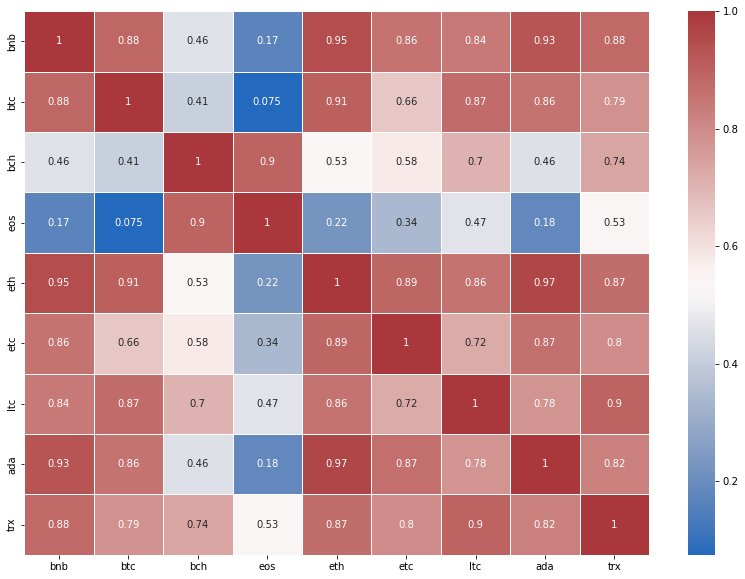

In [12]:
# close price correlation
plt.figure(figsize=(14, 10))
sns.heatmap(close_agg.corr(method='pearson'),  
            cmap='vlag', 
            annot=True, 
            linewidth=0.5)

In [13]:
# volume correlation
volume_agg.corr(method='pearson')

,bnb,btc,bch,eos,eth,etc,ltc,ada,trx
bnb,1.000000,0.344598,0.318429,0.300058,0.354095,0.034521,0.319474,0.284698,0.276284
btc,0.344598,1.000000,0.544069,0.470981,0.696269,0.052824,0.542041,0.413634,0.344823
bch,0.318429,0.544069,1.000000,0.535029,0.572184,0.068015,0.568010,0.406903,0.398072
eos,0.300058,0.470981,0.535029,1.000000,0.509580,0.067797,0.533025,0.409970,0.454124
eth,0.354095,0.696269,0.572184,0.509580,1.000000,0.057271,0.579277,0.449514,0.391865
etc,0.034521,0.052824,0.068015,0.067797,0.057271,1.000000,0.061657,0.047965,0.050000
ltc,0.319474,0.542041,0.568010,0.533025,0.579277,0.061657,1.000000,0.434601,0.412190
ada,0.284698,0.413634,0.406903,0.409970,0.449514,0.047965,0.434601,1.000000,0.377024
trx,0.276284,0.344823,0.398072,0.454124,0.391865,0.050000,0.412190,0.377024,1.000000


<AxesSubplot:>

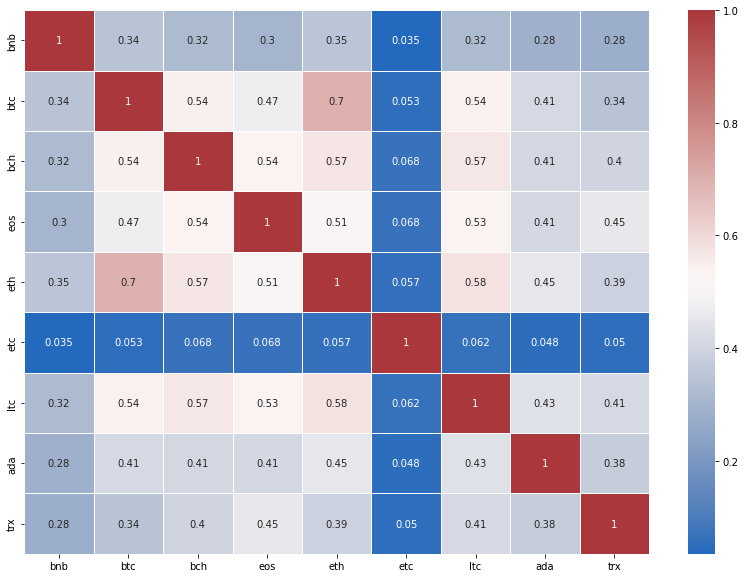

In [14]:
# volume correlation
plt.figure(figsize=(14, 10))
sns.heatmap(volume_agg.corr(method='pearson'),  
            cmap='vlag', 
            annot=True, 
            linewidth=0.5)

In [15]:
# target correlation
target_agg.corr(method='pearson')

,bnb,btc,bch,eos,eth,etc,ltc,ada,trx
bnb,1.000000,-0.039445,0.046235,-0.056934,-0.068263,-0.020567,-0.050308,0.105387,0.025011
btc,-0.039445,1.000000,-0.047830,-0.037317,0.109085,-0.121316,0.044487,-0.131269,-0.056195
bch,0.046235,-0.047830,1.000000,0.049118,-0.050182,0.002560,0.046479,-0.010171,-0.006144
eos,-0.056934,-0.037317,0.049118,1.000000,0.026180,-0.003796,0.114204,-0.024323,0.075586
eth,-0.068263,0.109085,-0.050182,0.026180,1.000000,-0.119004,0.061126,-0.109913,-0.034590
etc,-0.020567,-0.121316,0.002560,-0.003796,-0.119004,1.000000,-0.045844,0.005753,-0.002633
ltc,-0.050308,0.044487,0.046479,0.114204,0.061126,-0.045844,1.000000,-0.060409,-0.001888
ada,0.105387,-0.131269,-0.010171,-0.024323,-0.109913,0.005753,-0.060409,1.000000,0.080310
trx,0.025011,-0.056195,-0.006144,0.075586,-0.034590,-0.002633,-0.001888,0.080310,1.000000


<AxesSubplot:>

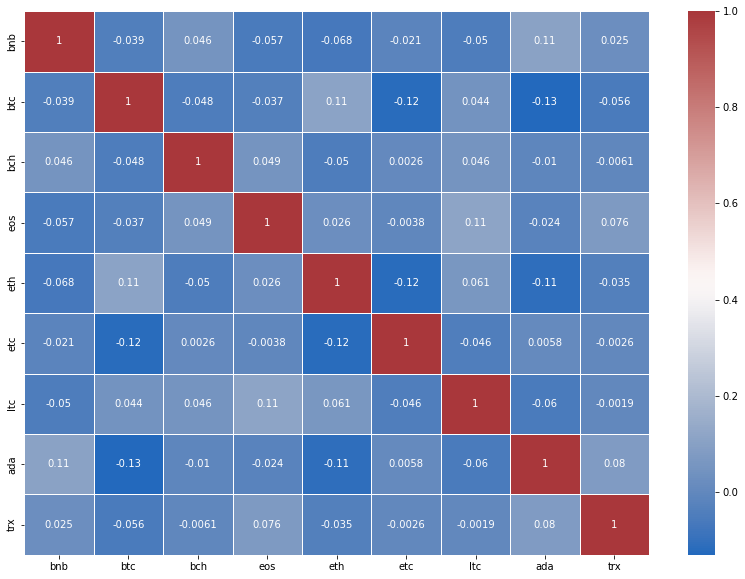

In [16]:
# target correlation
plt.figure(figsize=(14, 10))
sns.heatmap(target_agg.corr(method='pearson'),  
            cmap='vlag', 
            annot=True, 
            linewidth=0.5)

In [ ]:
# # export to csv
# bnb.to_csv('bnb.csv', index=True)
# btc.to_csv('btc.csv', index=True)
# bch.to_csv('bch.csv', index=True)
# eos.to_csv('eos.csv', index=True)
# eth.to_csv('eth.csv', index=True)
# etc.to_csv('etc.csv', index=True)
# ltc.to_csv('ltc.csv', index=True)
# ada.to_csv('ada.csv', index=True)
# trx.to_csv('trx.csv', index=True)

# DATA EXPLORATION

In [12]:
df = pd.read_csv('/Users/umay/Desktop/pj3data/train.csv')
asset = pd.read_csv('/Users/umay/Desktop/pj3data/asset_details.csv')
sup = pd.read_csv('/Users/umay/Desktop/pj3data/supplemental_train.csv')

In [13]:
for i in asset['Asset_ID']:
    print(i)
    print('length:', len(df[df['Asset_ID'] == i]))
    print()

2
length: 1953537

0
length: 1942619

1
length: 1956282

5
length: 1955140

7
length: 1951127

6
length: 1956200

9
length: 1956030

11
length: 1701261

13
length: 1874560

12
length: 1778749

3
length: 1791867

8
length: 1592071

10
length: 670497

4
length: 1156866



In [16]:
# work with btc first
btc = df[df['Asset_ID'] == 1]
bnb = df[df['Asset_ID'] == 0]
btc = df[df['Asset_ID'] == 1]
bch = df[df['Asset_ID'] == 2]
ada = df[df['Asset_ID'] == 3]
doge = df[df['Asset_ID'] == 4]
eos = df[df['Asset_ID'] == 5]
eth = df[df['Asset_ID'] == 6]
etc = df[df['Asset_ID'] == 7]
iota = df[df['Asset_ID'] == 8]
ltc = df[df['Asset_ID'] == 9]
mkr = df[df['Asset_ID'] == 10]
xmr = df[df['Asset_ID'] == 11]
xlm = df[df['Asset_ID'] == 12]
trx = df[df['Asset_ID'] == 13]
total = [bnb, btc, bch, ada, doge, eos, eth, etc, iota, ltc, mkr, xmr, xlm, trx]

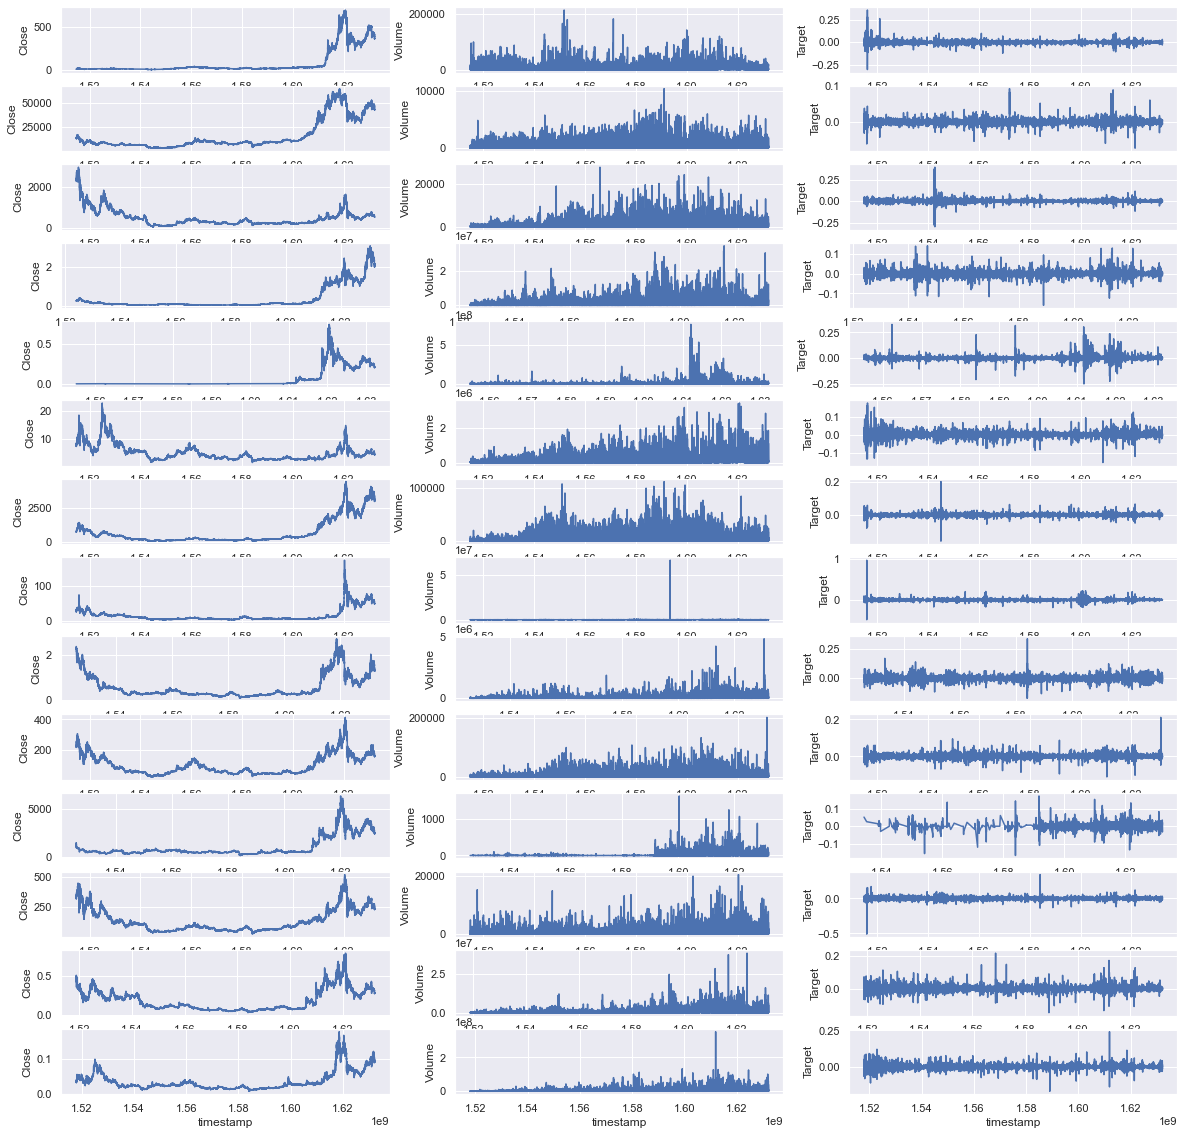

In [38]:
# general graphs show trend of btc
fig, axss = plt.subplots(14,3, figsize=[20, 20])
sns.set_theme(style="darkgrid")
for i in range(len(total)):
    fig1 = sns.lineplot(x='timestamp', y='Close', data=total[i], ax=axss[i,0])
    fig2 = sns.lineplot(x='timestamp', y='Volume', data=total[i], ax=axss[i,1])
    fig3 = sns.lineplot(x='timestamp', y='Target', data=total[i], ax=axss[i,2])

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

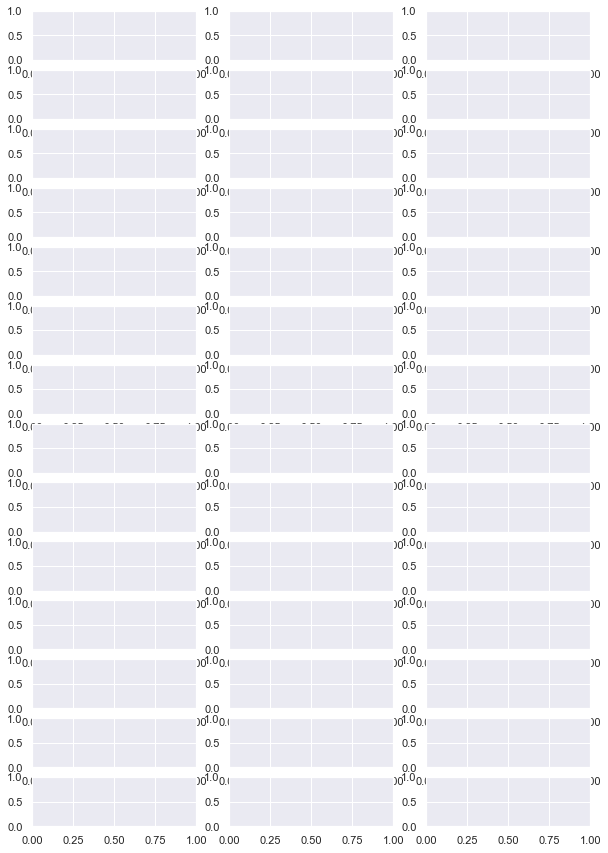

In [35]:
# fig, axss = plt.subplots(14,3, figsize=[10, 15])
# axss

In [17]:
# inspect data
btc = btc.set_index('timestamp')
btc.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956282 entries, 1514764860 to 1632182400
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Asset_ID  1956282 non-null  int64  
 1   Count     1956282 non-null  float64
 2   Open      1956282 non-null  float64
 3   High      1956282 non-null  float64
 4   Low       1956282 non-null  float64
 5   Close     1956282 non-null  float64
 6   Volume    1956282 non-null  float64
 7   VWAP      1956282 non-null  float64
 8   Target    1955978 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 149.3 MB


In [18]:
# identify missing values
btc.isna().sum()

Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target      304
dtype: int64

In [19]:
# check begin date and end date of data
beg_btc = btc.index[0].astype('datetime64[s]')
end_btc = btc.index[-1].astype('datetime64[s]')

print('BTC data goes from ', beg_btc, 'to ', end_btc)

BTC data goes from  2018-01-01T00:01:00 to  2021-09-21T00:00:00


In [20]:
# found out that the gap between should be in one minute
btc.index[1].astype('datetime64[s]')

numpy.datetime64('2018-01-01T00:02:00')

In [21]:
# check missing values
(btc.index[1:] - btc.index[:-1]).value_counts().head()

60     1956136
120         78
180         12
240         11
420          9
Name: timestamp, dtype: int64

In [22]:
# fill all missing values with the nearest
timeframe = range(btc.index[0], btc.index[-1]+60, 60)
btc = btc.reindex(timeframe, method='nearest')

In [23]:
# check if still has missing values (gap greater than 60 seconds)
(btc.index[1:] - btc.index[:-1]).value_counts().head()

60    1956959
Name: timestamp, dtype: int64

In [24]:
# show nan rows
btc[btc.isna().any(axis=1)]

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1571201700,1,15.0,8164.253333,8169.970000,8163.92,8165.283333,0.473769,8165.547106,NaN
1571201820,1,9.0,8167.122500,8169.770000,8165.01,8166.142500,0.622516,8167.036652,NaN
1571201940,1,22.0,8164.242500,8165.080000,8162.90,8163.950000,0.671666,8164.156317,NaN
1571202000,1,6.0,8164.370000,8166.000000,8159.41,8161.535000,0.593204,8164.801750,NaN
1571202060,1,6.0,8165.580000,8165.810000,8165.26,8165.260000,0.218742,8165.510211,NaN
...,...,...,...,...,...,...,...,...,...
1632182160,1,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,NaN
1632182220,1,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,NaN
1632182280,1,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,NaN


In [25]:
# use forward fill to fill nas
btc['Target'] = btc['Target'].fillna(method='pad')

In [26]:
# check correctness
btc[btc.isna().any(axis=1)]

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,


In [31]:
# 15 rows in the end has NaN in target
# remove those 15 rows
btc.drop(btc.tail(15).index, axis=0, inplace=True)

# Feature enginering

In [28]:
import os
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt
import seaborn as sns
## from lightgbm import LGBMRegressor
import time
from datetime import datetime
# auxiliary function, from datetime to timestamp
totimestamp = lambda s: np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple()))

import warnings
warnings.filterwarnings("ignore")

In [31]:
asset.head()

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic


In [36]:
df_train=bnb.copy()
asset_data=asset.copy()

In [32]:
import numpy as np
import pandas as pd
from datetime import datetime
import pandas_datareader as pdr
import os

from ta.momentum import AwesomeOscillatorIndicator, KAMAIndicator, PercentagePriceOscillator
from ta.momentum import PercentageVolumeOscillator, ROCIndicator
from ta.momentum import RSIIndicator, StochRSIIndicator, StochasticOscillator
from ta.momentum import TSIIndicator, UltimateOscillator, WilliamsRIndicator
from ta.volume import AccDistIndexIndicator, ChaikinMoneyFlowIndicator
from ta.volume import EaseOfMovementIndicator, MFIIndicator
from ta.volume import NegativeVolumeIndexIndicator, OnBalanceVolumeIndicator, VolumePriceTrendIndicator
from ta.volatility import AverageTrueRange, BollingerBands, DonchianChannel, KeltnerChannel, UlcerIndex
from ta.trend import ADXIndicator, EMAIndicator, MACD, MassIndex, PSARIndicator
from ta.trend import STCIndicator, TRIXIndicator, WMAIndicator, VortexIndicator
from ta.others import CumulativeReturnIndicator, DailyLogReturnIndicator, DailyReturnIndicator

class FeatureEngineer():

    # add new features
    def build_technical_indicators(self, df):
        
        df['open_sub_close'] = df['Open'] - df['Close']
        df['high_div_low'] = df['High'] / df['Low']

        # MA8, 21, 50, 200 - volume
        df['ma8_vol'] = df['Volume'].rolling(8).mean()
        df['ma21_vol'] = df['Volume'].rolling(21).mean()
        df['ma50_vol'] = df['Volume'].rolling(50).mean()
        df['ma200_vol'] = df['Volume'].rolling(200).mean()
        
        
        
        # momentum indicators
        moment_aoi = AwesomeOscillatorIndicator(df['High'], df['Low'])
        df['AO'] = moment_aoi.awesome_oscillator()
        
        moment_kama = KAMAIndicator(df['Close']) # Kaufman's Adaptive Moving Average
        df['KAMA'] = moment_kama.kama()
        
        moment_ppo = PercentagePriceOscillator(df['Close'])
        df['PPO'], df['PPO_signal'] = moment_ppo.ppo(), moment_ppo.ppo_signal()
        
        moment_pvo = PercentageVolumeOscillator(df['Volume'])
        df['PVO'], df['PVO_signal'] = moment_pvo.pvo(), moment_pvo.pvo_signal()
        
        moment_roc = ROCIndicator(df['Close']) # Rate of Change
        df['ROC'] = moment_roc.roc()
        
        moment_rsi = RSIIndicator(df['Close']) # Relative Strength Index
        df['RSI'] = moment_rsi.rsi()
        
        moment_rsi_ = StochRSIIndicator(df['Close'])
        df['RSI_stoch'] = moment_rsi_.stochrsi()
        df['RSI_stoch_d'] = moment_rsi_.stochrsi_d()
        df['RSI_stoch_k'] = moment_rsi_.stochrsi_k()
        
        moment_stoch = StochasticOscillator(df['Close'], df['High'], df['Low'])
        df['stoch'], df['stoch_signal'] = moment_stoch.stoch(), moment_stoch.stoch_signal()
        
        moment_tsi = TSIIndicator(df['Close']) # True Strength Index
        df['TSI'] = moment_tsi.tsi()
        
        moment_ult = UltimateOscillator(df['High'], df['Low'], df['Close'])
        df['ult'] = moment_ult.ultimate_oscillator()
        
        moment_wri = WilliamsRIndicator(df['High'], df['Low'], df['Close']) # Williams %R
        df['WRI'] = moment_wri.williams_r()
        
        
        
        # volume indicators
        vol_adi = AccDistIndexIndicator(df['High'], df['Low'], df['Close'], df['Volume']) # Accumulation/Distribution Index
        df['ADI'] = vol_adi.acc_dist_index()
        
        vol_cmf = ChaikinMoneyFlowIndicator(df['High'], df['Low'], df['Close'], df['Volume'])
        df['CMF'] = vol_cmf.chaikin_money_flow()
        
        vol_eom = EaseOfMovementIndicator(df['High'], df['Low'], df['Volume'])
        df['EoM'], df['EoM_signal'] = vol_eom.ease_of_movement(), vol_eom.sma_ease_of_movement()
        
        vol_mfi = MFIIndicator(df['High'], df['Low'], df['Close'], df['Volume']) # Money Flow Index
        df['MFI'] = vol_mfi.money_flow_index()
        
        vol_nvi = NegativeVolumeIndexIndicator(df['Close'], df['Volume'])
        df['NVI'] = vol_nvi.negative_volume_index()
        
        vol_obv = OnBalanceVolumeIndicator(df['Close'], df['Volume'])
        df['OBV'] = vol_obv.on_balance_volume()
        
        vol_vpt = VolumePriceTrendIndicator(df['Close'], df['Volume'])
        df['VPT'] = vol_vpt.volume_price_trend()
        
        
        
        # volatility indicators
        vola_atr = AverageTrueRange(df['High'], df['Low'], df['Close'])
        df['ATR'] = vola_atr.average_true_range()
        
        vola_boll = BollingerBands(df['Close'])
        df['BOLL+'] = vola_boll.bollinger_hband()
        df['BOLL-'] = vola_boll.bollinger_lband()
        df['BOLL_mid'] = vola_boll.bollinger_mavg()
        df['BOLL_percent'] = vola_boll.bollinger_pband()
        df['BOLL_width'] = vola_boll.bollinger_wband()
        
        vola_dc = DonchianChannel(df['High'], df['Low'], df['Close'])
        df['DC+'] = vola_dc.donchian_channel_hband()
        df['DC-'] = vola_dc.donchian_channel_lband()
        df['DC_mid'] = vola_dc.donchian_channel_mband()
        df['DC_percent'] = vola_dc.donchian_channel_pband()
        df['DC_width'] = vola_dc.donchian_channel_wband()
        
        vola_kc = KeltnerChannel(df['High'], df['Low'], df['Close'])
        df['KC+'] = vola_kc.keltner_channel_hband()
        df['KC-'] = vola_kc.keltner_channel_lband()
        df['KC_mid'] = vola_kc.keltner_channel_mband()
        df['KC_percent'] = vola_kc.keltner_channel_pband()
        df['KC_width'] = vola_kc.keltner_channel_wband()
        
        vola_ui = UlcerIndex(df['Close'])
        df['Ulcer'] = vola_ui.ulcer_index()
        
        
        
        # trend indicators
        trend_adx = ADXIndicator(df['High'], df['Low'], df['Close']) 
        df['ADX'], df['ADX+'], df['ADX-'] = trend_adx.adx(), trend_adx.adx_pos(), trend_adx.adx_neg()
        
        df['ema7_price'] = EMAIndicator(df['Close'], 7).ema_indicator() # EMA7
        df['ema21_price'] = EMAIndicator(df['Close'], 21).ema_indicator() # EMA21
        df['ema50_price'] = EMAIndicator(df['Close'], 50).ema_indicator() # EMA50
        df['ema200_price'] = EMAIndicator(df['Close'], 200).ema_indicator() # EMA200
        
        trend_macd = MACD(df['Close']) # MACD
        df['MACD'], df['MACD_signal'] = trend_macd.macd(), trend_macd.macd_signal()
        
        trend_mass_index = MassIndex(df['High'], df['Low']) 
        df['MI'] = trend_mass_index.mass_index()
        
        trend_psar = PSARIndicator(df['High'], df['Low'], df['Close']) # Parabolic Stop and Reverse 
        df['PSAR'], df['PSAR+'], df['PSAR-'] = trend_psar.psar(), trend_psar.psar_up(), trend_psar.psar_down()
        
        trend_stc = STCIndicator(df['Close']) # Schaff Trend Cycle
        df['STC'] = trend_stc.stc()
        
        trend_trix = TRIXIndicator(df['Close']) # Trix
        df['TRIX'] = trend_trix.trix()
        
        trend_vi = VortexIndicator(df['High'], df['Low'], df['Close'])
        df['VI'] = trend_vi.vortex_indicator_diff()
        df['VI+'] = trend_vi.vortex_indicator_pos()
        df['VI-'] = trend_vi.vortex_indicator_neg()
        
        trend_wma = WMAIndicator(df['Close']) # Weighted Moving Average
        df['WMA'] = trend_wma.wma()
        
        
        
        # others indicators
        other_cr = CumulativeReturnIndicator(df['Close'])
        df['CR'] = other_cr.cumulative_return()
        other_dlr = DailyLogReturnIndicator(df['Close'])
        df['DLR'] = other_dlr.daily_log_return()
        other_dr = DailyReturnIndicator(df['Close'])
        df['DR'] = other_dr.daily_return()
        
        return df



    def import_external_data():

        # commodity
        gc = pdr.get_data_yahoo('GC=F', start, end) # gold
        sil = pdr.get_data_yahoo('SI=F', start, end) # silver
        oil = pdr.get_data_yahoo('CL=F', start, end) # crude oil

        # dollar and bond
        dollar = pdr.get_data_yahoo('EURUSD=X', start, end) # EUR/USD
        bond = pdr.get_data_yahoo('^TNX', start, end) # 10-year treasury bond

        # futures 22
        wheat = pdr.get_data_yahoo('ZWH22.CBT', start, end) # wheat
        corn = pdr.get_data_yahoo('ZCH22.CBT', start, end) # corn
        soy = pdr.get_data_yahoo('ZSH22.CBT', start, end) # soybean
        oat = pdr.get_data_yahoo('ZOH22.CBT', start, end) # oat
        usd = pdr.get_data_yahoo('DXH22.NYB', start, end) # USD

        # stock market
        spy = pdr.get_data_yahoo('SPY', start, end) # SPY
        dia = pdr.get_data_yahoo('DIA', start, end) # DIA
        qqq = pdr.get_data_yahoo('QQQ', start, end) # QQQ
        iwm = pdr.get_data_yahoo('IWM', start, end) # russell
        vix = pdr.get_data_yahoo('^VIX', start, end) # VIX
        bkch = pdr.get_data_yahoo('BKCH', start, end) # blockchain etf

In [33]:
bnb = bnb.sample(n=50000, replace=False, random_state=1)
tool = FeatureEngineer()
bnb = tool.build_technical_indicators(bnb) # construct technical indicators
bnb.drop(columns=['Asset_ID', 'KAMA', 'PSAR+', 'PSAR-'], inplace=True) # drop columns with too many NAs
bnb.dropna(axis=0, inplace=True) # drop rows contain missing
r = bnb.index[np.isinf(bnb).any(1)]
bnb.drop([i for i in r], axis=0, inplace=True) # drop rows contain infinity

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils import data
from torch.utils.data import Dataset, DataLoader
from torch.nn import functional as F
from torchvision import datasets, models, transforms

In [39]:
x = bnb.drop(columns=['Target', 'Open', 'High', 'Low'])
y = bnb['Target']
scaler = MinMaxScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [60]:
bnb.head()

,timestamp,Count,Open,High,Low,Close,Volume,VWAP,Target,open_sub_close,...,PSAR,STC,TRIX,VI,VI+,VI-,WMA,CR,DLR,DR
1408339,1524618420,54.0,14.67820,14.6857,14.6782,14.6856,2101.490,14.683014,0.004076,-0.00740,...,262.145053,14.825661,-0.824572,-0.000103,0.998514,0.998617,54.899844,-21.250925,-5.832441,-5.665613
5844051,1547929620,4.0,6.55970,6.5597,6.5546,6.5546,1699.590,6.555553,0.000885,0.00510,...,247.034422,10.875012,-1.138428,-0.000876,0.998167,0.999043,47.206098,-64.852053,-80.670033,-55.367162
9096899,1563575220,7.0,29.08100,29.0810,29.0628,29.0631,111.790,29.064281,-0.003507,0.01790,...,227.796036,5.952012,-1.443962,-0.000138,0.998437,0.998574,44.355782,55.846015,148.930224,343.400055
18717856,1608523920,202.0,35.35175,35.3846,35.3100,35.3180,2029.937,35.334926,-0.004093,0.03375,...,210.096721,2.976006,-1.720489,-0.000481,0.997799,0.998280,42.339887,89.386871,19.492342,21.521792
11701874,1576329060,34.0,14.57400,14.5833,14.5651,14.5695,226.980,14.570803,0.003573,0.00450,...,193.813352,1.488003,-2.012973,-0.000310,0.996661,0.996972,36.031256,-21.873492,-88.546245,-58.747664


In [ ]:
# x_train= train.drop(columns=['Target', 'Open', 'High', 'Low'])
# y_train = train['Target']

# Modeling

In [43]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import glob
import os
from tqdm import tqdm
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [44]:
def model_training(X,y):
    # Model training
    parameters = {
    "learning_rate": [0.01, 0.1, 0.2, 0.5] ,
    "max_depth": [3, 4, 5, 6, 8, 12, 15, 18],
    "min_child_weight": [1, 3, 5, 7],
    "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7, 1],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0]
}
    model = xgb.XGBRegressor(objective= "reg:squarederror")
    searchcv = RandomizedSearchCV(estimator=model, param_distributions=parameters, scoring='neg_mean_squared_error',
                    cv=3, n_jobs=-1)
    searchcv.fit(X,y)
    
    return searchcv

In [45]:
model=model_training(x_train,y_train)
y_pred = model.predict(x_test)
corr, _ = pearsonr(y_pred, y_test)
print('Correlation Score:', corr)

rmse = mean_squared_error(y_pred, y_test, squared=False)
print('RMSE:', rmse)

Correlation Score: -0.017419778579465854
RMSE: 0.005238193184378952


In [50]:
xgb_reg = xgb.XGBRegressor(objective= "reg:squarederror")

In [51]:
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
pred = xgb_reg.predict(x_test)

In [53]:
corr, _ = pearsonr(pred, y_test)
print('Correlation Score:', corr)

rmse = mean_squared_error(pred, y_test, squared=False)
print('RMSE:', rmse)

Correlation Score: 0.018224995250190314
RMSE: 0.0054962632256734725


In [56]:
print(xgb_reg.feature_importances_)

[0.02109197 0.0253597  0.01776774 0.01659927 0.02311222 0.01409878
 0.01509088 0.02012863 0.02151266 0.01354192 0.0241727  0.01175261
 0.00857366 0.01200123 0.0230676  0.01641553 0.01363751 0.01841545
 0.01473321 0.01035304 0.0089451  0.02662444 0.01320449 0.01291448
 0.01616538 0.01120933 0.01075431 0.01717122 0.01431733 0.01181766
 0.01462393 0.00904366 0.00987557 0.01505486 0.00884209 0.00708342
 0.00757598 0.01544686 0.02059131 0.01110156 0.02673881 0.01741697
 0.00727436 0.01489126 0.0160118  0.00604504 0.00659968 0.00986856
 0.01264862 0.01329466 0.01213892 0.01061443 0.01772111 0.02045622
 0.01813599 0.01759657 0.0111765  0.01659883 0.01384938 0.01119758
 0.0125911  0.01553115 0.01301911 0.01212908 0.0174621  0.00875559
 0.01137451 0.00899632 0.         0.0160763  0.        ]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

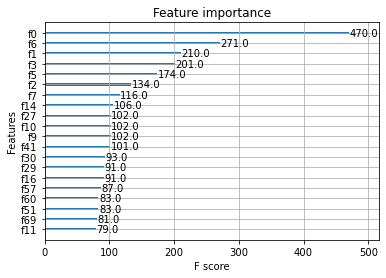

In [57]:
plot_importance(xgb_reg,max_num_features=20)

In [59]:
bnb.to_csv('/Users/umay/Desktop/bnb.csv', index=True)

In [61]:
model.best_params_

{'reg_lambda': 50.0,
 'min_child_weight': 3,
 'max_depth': 18,
 'learning_rate': 0.01,
 'colsample_bytree': 0.3}